# Importing Dependices


In [558]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
from torch import nn
import matplotlib.pyplot as plt

# Perparing the Dataset

In [559]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [560]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [561]:
# Check different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

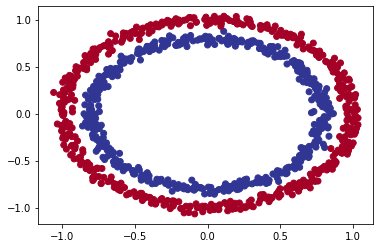

In [562]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

# Converting and Splitting the Data

In [563]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [564]:
from sklearn.model_selection import train_test_split

In [565]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=21
)

In [566]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Building the Model

In [567]:
class ClassificationModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer_1=nn.Linear(in_features=2,out_features=10)
    self.Layer_2=nn.Linear(in_features=10,out_features=10)
    self.relu=nn.ReLU()
    self.Layer_3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    return self.Layer_3(self.relu(self.Layer_2(self.relu(self.Layer_1(x)))))

In [568]:
model=ClassificationModel().to(device)

In [569]:
# # Make predictions with the model
# untrained_preds = model(X_test.to(device))
# print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
# print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
# print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
# print(f"\nFirst 10 test labels:\n{y_test[:10]}")

In [570]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

# Training the Model

In [571]:
epochs=1000
torch.manual_seed(42)

In [572]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [573]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1)

In [574]:
# # Build model with non-linear activation function
# from torch import nn
# class CircleModelV2(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layer_1 = nn.Linear(in_features=2, out_features=10)
#         self.layer_2 = nn.Linear(in_features=10, out_features=10)
#         self.layer_3 = nn.Linear(in_features=10, out_features=1)
#         self.relu = nn.ReLU() # <- add in ReLU activation function
#         # Can also put sigmoid in the model 
#         # This would mean you don't need to use it on the predictions
#         # self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#       # Intersperse the ReLU activation function between layers
#        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# model = CircleModelV2().to(device)
# print(model)


In [575]:
# for epoch in range(epochs):
#   # Forward Pass
#   y_logits = model(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
#   y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
#   # Calculating Loss and Accuracy
#   loss=loss_fn(y_logits,y_train)
#   acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
#     # 2. Calculate loss and accuracy
# #     loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
# #     acc = accuracy_fn(y_true=y_train, 
# #                       y_pred=y_pred)
#   # Optimizer zero grad
#   optimizer.zero_grad()
#   # Backward Pass
#   loss.backward()
#   # Step Gradient
#   optimizer.step()
#   # Testing
#   model.eval()
#   with torch.inference_mode():
#       # 1. Forward pass
#       test_logits = model(X_test).squeeze() 
#       test_pred = torch.round(torch.sigmoid(test_logits))
#       # 2. Caculate loss/accuracy
#       test_loss = loss_fn(test_logits,
#                           y_test)
#       test_acc = accuracy_fn(y_true=y_test,
#                              y_pred=test_pred)

#       # Print out what's happening every 10 epochs
#       if epoch % 10 == 0:
#          print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    

# Making Predictions

In [576]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [577]:
# loss_fn = nn.BCEWithLogitsLoss()
# optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [578]:
# # Fit the model
# torch.manual_seed(42)
# epochs = 1000

# # Put all data on target device
# X_train, y_train = X_train.to(device), y_train.to(device)
# X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69432, Accuracy: 49.88% | Test Loss: 0.69296, Test Accuracy: 49.50%
Epoch: 100 | Loss: 0.01287, Accuracy: 100.00% | Test Loss: 0.01897, Test Accuracy: 100.00%
Epoch: 200 | Loss: 0.00463, Accuracy: 100.00% | Test Loss: 0.01324, Test Accuracy: 100.00%
Epoch: 300 | Loss: 0.00285, Accuracy: 100.00% | Test Loss: 0.01288, Test Accuracy: 99.50%
Epoch: 400 | Loss: 0.00198, Accuracy: 100.00% | Test Loss: 0.01340, Test Accuracy: 99.50%
Epoch: 500 | Loss: 0.00146, Accuracy: 100.00% | Test Loss: 0.01377, Test Accuracy: 99.50%
Epoch: 600 | Loss: 0.00111, Accuracy: 100.00% | Test Loss: 0.01525, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.00084, Accuracy: 100.00% | Test Loss: 0.01655, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.00066, Accuracy: 100.00% | Test Loss: 0.01874, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.00051, Accuracy: 100.00% | Test Loss: 0.02237, Test Accuracy: 98.00%


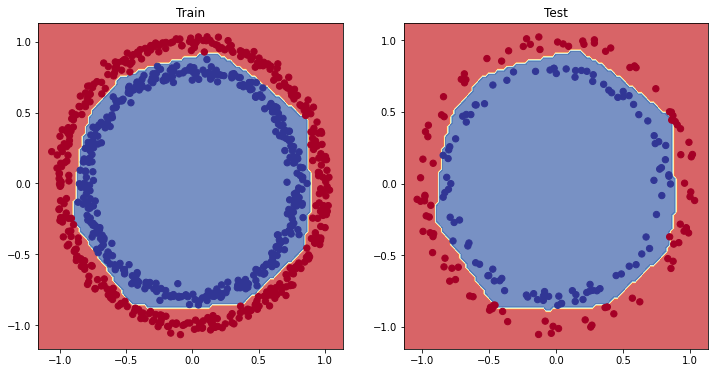

In [579]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)